### In this lesson, we'll design a Generative Adversarial Network (GAN) to generate pictures of clothes!
But first, we'll discuss the components that make up GANs


---



## Overview of Discriminative vs. Generative AI
## The difference between Discriminative and Generative AI
*   Discriminatory models learn to distinguish between classes based on given features in the data
    *   E.g. models trained to distinguish between dogs and cats
*   Generative AI models learn patterns in data to replicate them
    *   If given sufficent examples of dogs, can learn to create new images of them!

In [ ]:
# Import all necessary libraries. We won't go into detail about what they do.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers, Sequential
from keras.datasets import fashion_mnist
from keras.optimizers import Adam

# Use keras to download the fashion MNIST dataset directly. We'll use this dataset to train our GAN.
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


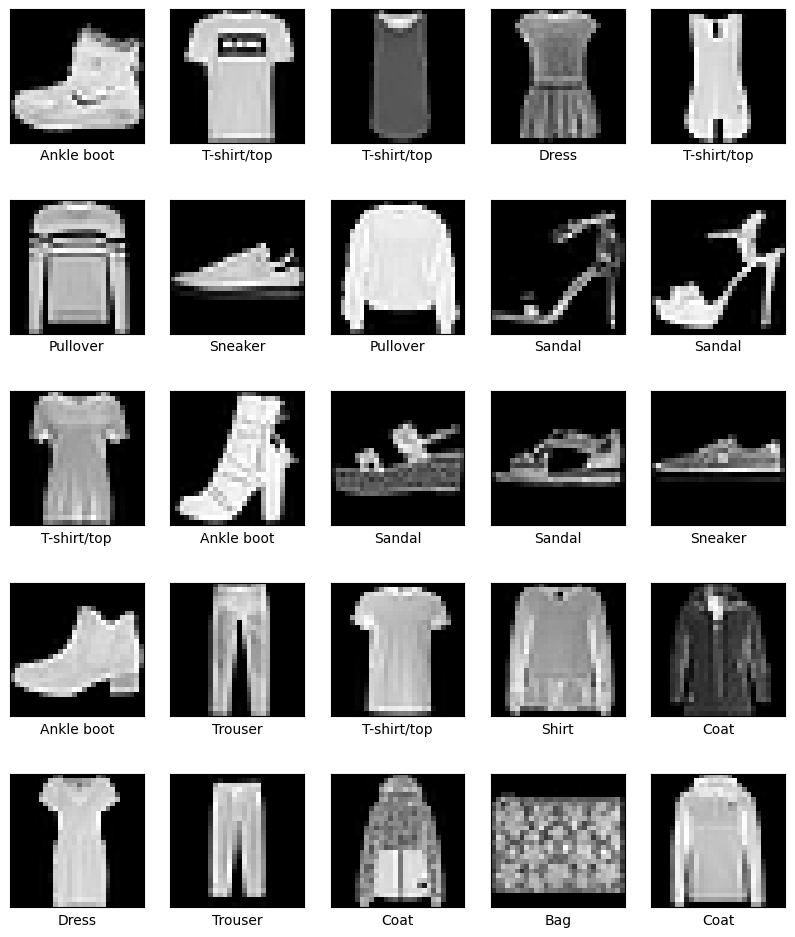

In [ ]:
# Visualize 25 apparel from the train dataset.
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize = [10,12])
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap='gray')
  plt.xlabel(class_names[y_train[i]])

# Flatten and scale the train and test images.
X_train = X_train.reshape(-1, 784)
X_train = (X_train / 255 - 0.5) * 2
X_test  = X_test.reshape(-1, 784)
X_test  = (X_test / 255 - 0.5) * 2

# What are Generative Adversarial Networks (GANs)?
GANs are a type of Neural Network used for generative AI. They are called Adversarial Networks because two Neural Networks compete against each other.

In [ ]:
import keras
import keras.backend as K
from keras.layers import Input, Dense, Activation, LeakyReLU, BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam

# Build the generator and discriminator networks.
def make_simple_GAN(sample_size):
    K.clear_session()

    # Generator network
    generator = Sequential()
    generator.add(Input(shape=(sample_size,)))
    generator.add(Dense(128, activation = LeakyReLU(alpha=0.01)))
    generator.add(Dense(256, activation = LeakyReLU(alpha=0.01)))
    generator.add(layers.BatchNormalization())
    generator.add(Dense(784, activation ='tanh'))

    # Discriminator network
    discriminator = Sequential()
    discriminator.add(Input(shape=(784,)))
    discriminator.add(Dense(128, activation = LeakyReLU(alpha=0.01)))
    discriminator.add(Dense(256, activation = LeakyReLU(alpha=0.01)))
    discriminator.add(Dense(1, activation ='sigmoid'))

    # Build the GAN network.
    gan = Sequential([generator, discriminator])

    discriminator.compile(optimizer = Adam(learning_rate=0.001), loss = 'binary_crossentropy')
    gan.compile(optimizer = Adam(learning_rate=0.0001), loss = 'binary_crossentropy')

    return gan, generator, discriminator

In [ ]:
# Helper functions to generate noisy samples
def make_latent_samples(n_samples, sample_size):
    return np.random.normal(loc=0, scale=1, size=(n_samples, sample_size))

def make_trainable(model, trainable):
    for layer in model.layers:
        layer.trainable = trainable


# How do GANS learn?
The generative model gets feedback from the discriminative model. The goal of the generative model is to confuse the discriminative model until it reaches equilibrium (it's accuracy is 50%)!

1/1 [==============================] - 1s 827ms/step


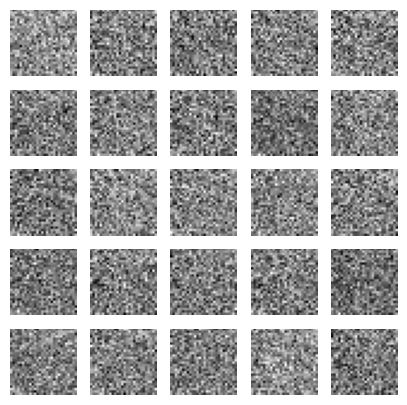

Epoch:   1/50 Discriminator Loss: 0.1036 Generator Loss: 5.5298
Epoch:   2/50 Discriminator Loss: 0.2387 Generator Loss: 3.5797
Epoch:   3/50 Discriminator Loss: 0.1962 Generator Loss: 3.2711
Epoch:   4/50 Discriminator Loss: 0.4362 Generator Loss: 2.8957
Epoch:   5/50 Discriminator Loss: 0.5513 Generator Loss: 2.5135
Epoch:   6/50 Discriminator Loss: 0.4965 Generator Loss: 1.7462
Epoch:   7/50 Discriminator Loss: 0.5148 Generator Loss: 1.6231
Epoch:   8/50 Discriminator Loss: 0.7546 Generator Loss: 1.7981
Epoch:   9/50 Discriminator Loss: 0.7488 Generator Loss: 1.7412
Epoch:  10/50 Discriminator Loss: 0.5395 Generator Loss: 2.0670
1/1 [==============================] - 0s 31ms/step


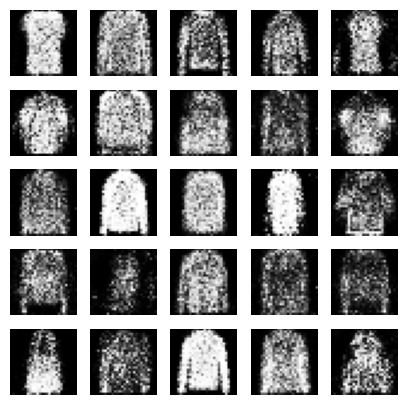

Epoch:  11/50 Discriminator Loss: 0.8906 Generator Loss: 1.3733
Epoch:  12/50 Discriminator Loss: 0.2953 Generator Loss: 2.7047
Epoch:  13/50 Discriminator Loss: 1.0442 Generator Loss: 2.4025
Epoch:  14/50 Discriminator Loss: 0.6807 Generator Loss: 2.4217
Epoch:  15/50 Discriminator Loss: 0.7135 Generator Loss: 1.9326
Epoch:  16/50 Discriminator Loss: 0.6086 Generator Loss: 2.4354
Epoch:  17/50 Discriminator Loss: 0.6768 Generator Loss: 2.0318
Epoch:  18/50 Discriminator Loss: 0.8881 Generator Loss: 1.7351
Epoch:  19/50 Discriminator Loss: 0.6276 Generator Loss: 2.0053
Epoch:  20/50 Discriminator Loss: 0.8114 Generator Loss: 1.9029
1/1 [==============================] - 0s 26ms/step


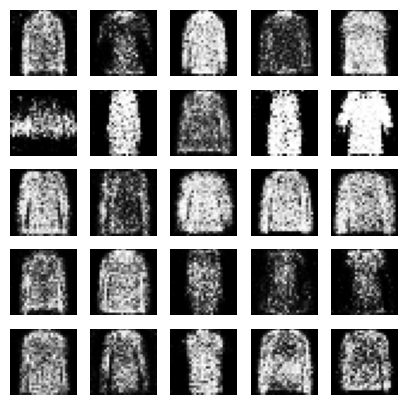

Epoch:  21/50 Discriminator Loss: 0.5772 Generator Loss: 1.9007
Epoch:  22/50 Discriminator Loss: 0.5377 Generator Loss: 2.8813
Epoch:  23/50 Discriminator Loss: 0.6914 Generator Loss: 2.6169
Epoch:  24/50 Discriminator Loss: 0.5701 Generator Loss: 1.6469
Epoch:  25/50 Discriminator Loss: 0.9470 Generator Loss: 1.9142
Epoch:  26/50 Discriminator Loss: 0.6778 Generator Loss: 2.5601
Epoch:  27/50 Discriminator Loss: 0.5903 Generator Loss: 2.3994
Epoch:  28/50 Discriminator Loss: 0.4929 Generator Loss: 2.7917
Epoch:  29/50 Discriminator Loss: 0.7983 Generator Loss: 1.8323
Epoch:  30/50 Discriminator Loss: 0.7835 Generator Loss: 1.7113
1/1 [==============================] - 0s 17ms/step


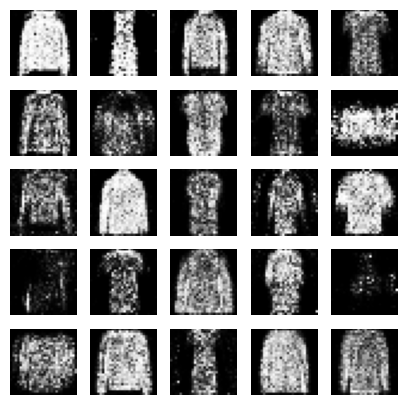

Epoch:  31/50 Discriminator Loss: 0.9176 Generator Loss: 2.2520
Epoch:  32/50 Discriminator Loss: 0.7963 Generator Loss: 1.6774
Epoch:  33/50 Discriminator Loss: 1.1344 Generator Loss: 1.5542
Epoch:  34/50 Discriminator Loss: 0.5468 Generator Loss: 2.2998
Epoch:  35/50 Discriminator Loss: 0.6292 Generator Loss: 1.9204
Epoch:  36/50 Discriminator Loss: 0.6903 Generator Loss: 2.0733
Epoch:  37/50 Discriminator Loss: 0.6663 Generator Loss: 2.0681
Epoch:  38/50 Discriminator Loss: 0.6945 Generator Loss: 1.8827
Epoch:  39/50 Discriminator Loss: 0.9918 Generator Loss: 1.9211
Epoch:  40/50 Discriminator Loss: 0.8928 Generator Loss: 1.5004
1/1 [==============================] - 0s 17ms/step


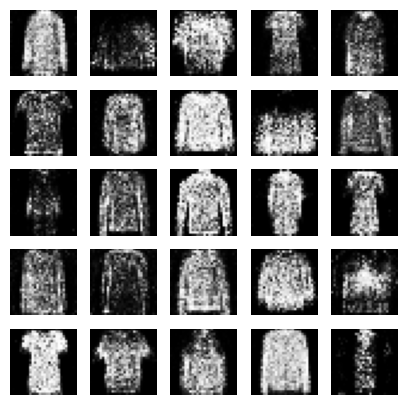

Epoch:  41/50 Discriminator Loss: 1.2187 Generator Loss: 1.3977
Epoch:  42/50 Discriminator Loss: 0.8459 Generator Loss: 2.4973
Epoch:  43/50 Discriminator Loss: 0.6972 Generator Loss: 1.6770
Epoch:  44/50 Discriminator Loss: 0.9009 Generator Loss: 1.4692
Epoch:  45/50 Discriminator Loss: 0.5267 Generator Loss: 2.0128
Epoch:  46/50 Discriminator Loss: 0.7148 Generator Loss: 2.0060
Epoch:  47/50 Discriminator Loss: 3.2942 Generator Loss: 1.9706
Epoch:  48/50 Discriminator Loss: 0.8230 Generator Loss: 2.1766
Epoch:  49/50 Discriminator Loss: 0.9569 Generator Loss: 1.5835
Epoch:  50/50 Discriminator Loss: 0.5797 Generator Loss: 2.6169


In [ ]:
# Choose appropriate hyperparameters.
sample_size     = 100
epochs          = 50
batch_size      = 64
eval_size       = 16
smooth          = 0.1

# Create labels for real and fake images
y_train_real, y_train_fake = np.ones([batch_size, 1]), np.zeros([batch_size, 1])
y_eval_real,  y_eval_fake  = np.ones([eval_size, 1]), np.zeros([eval_size, 1])

gan, generator, discriminator = make_simple_GAN(sample_size)

losses = []
for e in range(epochs):
    if e % 10 == 0:
          latent_samples = make_latent_samples(25, sample_size)
          generated_digits = generator.predict(latent_samples)

          plt.figure(figsize=(5, 5))
          for i in range(25):
              img = generated_digits[i]
              img = (img / 2 + 0.5) * 255
              img = img.reshape(28, 28)
              plt.subplot(5, 5, i + 1)
              plt.imshow(img, cmap='gray')
              plt.axis('off')
          plt.show()

    for i in range(len(X_train)//batch_size):
        # Indices for real images
        X_batch_real = X_train[i*batch_size:(i+1)*batch_size]

        # Generate fake images
        latent_samples = make_latent_samples(batch_size, sample_size)
        X_batch_fake = generator.predict_on_batch(latent_samples)

        # Train discriminator
        make_trainable(discriminator, True)
        discriminator.train_on_batch(X_batch_real, y_train_real * (1 - smooth))
        discriminator.train_on_batch(X_batch_fake, y_train_fake)

        # Train generator
        make_trainable(discriminator, False)
        gan.train_on_batch(latent_samples, y_train_real)

    # Evaluate the model
    X_eval_real = X_test[np.random.choice(len(X_test), eval_size, replace=False)]

    latent_samples = make_latent_samples(eval_size, sample_size)
    X_eval_fake = generator.predict_on_batch(latent_samples)

    d_loss = discriminator.test_on_batch(X_eval_real, y_eval_real)
    d_loss = d_loss + discriminator.test_on_batch(X_eval_fake, y_eval_fake)

    # The fake images are labeled a real to test if the discriminator can be fooled.
    g_loss = gan.test_on_batch(latent_samples, y_eval_real)

    losses.append((d_loss, g_loss))

    print("Epoch: {:>3}/{} Discriminator Loss: {:>6.4f} Generator Loss: {:>6.4f}".format(
        e+1, epochs, d_loss, g_loss))

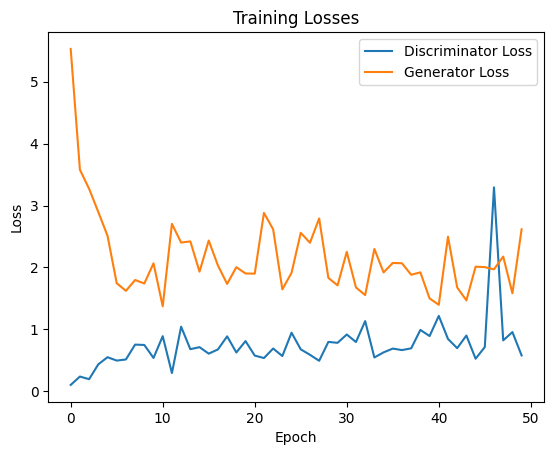

2/2 [==============================] - 0s 5ms/step


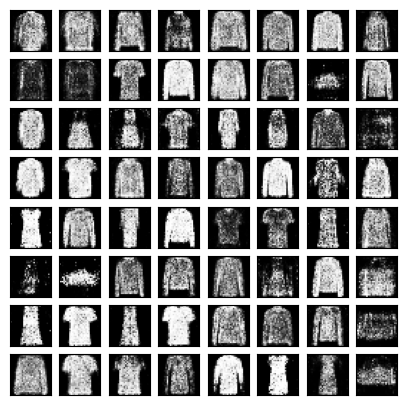

In [ ]:
# Plot the loss curves for the discriminator and generator.
loss = np.array(losses)
plt.plot(loss[:, 0], label='Discriminator Loss')
plt.plot(loss[:, 1], label='Generator Loss')
plt.title('Training Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# After the GAN is trained, generate and visualize 64 apparels.
latent_samples = make_latent_samples(64, sample_size)
generated_digits = generator.predict(latent_samples)

plt.figure(figsize=(5, 5))

for i in range(64):
  img = generated_digits[i]
  img = (img / 2 + 1)* 255
  img = img.reshape(28, 28)
  plt.subplot(8, 8, i+1)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])